In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as scp
import math

In [3]:
data = pd.read_csv('../exercises/data/ex10_data.csv')
data

,x
0,1.162271
1,1.142611
2,1.487702
3,1.214966
4,0.378743
...,...
599,0.249427
600,1.052465
601,1.383870
602,0.792205


In [4]:
def sig_x_pdf(mu,sigma,x):
    f = (1/(sigma*math.erf(2*math.sqrt(2))*math.sqrt(2*math.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)
    return f

Text(0, 0.5, 'number of events')

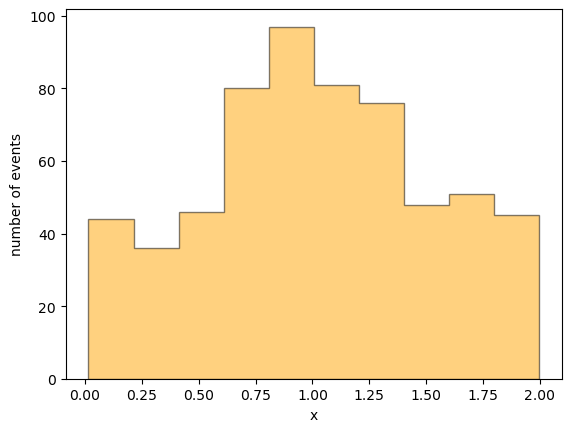

In [5]:
# (a) plot x

plt.hist(data.x, bins=10, alpha=0.5, histtype='stepfilled', color='orange', edgecolor='black')
plt.xlabel('x')
plt.ylabel('number of events')

In [6]:
# (b) define extended log-likelihood

def neg_ext_LLH(nuS, nuB, x):
    nu = nuS + nuB
    l = np.array([np.log(nuS*sig_x_pdf(1,0.25,k)+nuB*0.5) for k in x])
    llh = -nu + np.sum(l)
    return -llh

In [7]:
# (c) fit for nu_B=420.7

def fitfunc(nuS, x):
    return neg_ext_LLH(nuS, 420.7, x)
    
fit = scp.optimize.minimize(fitfunc, args=data.x, x0=200.0, method='Nelder-Mead')
fit

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -2874.7137057691216
             x: [ 1.793e+02]
           nit: 20
          nfev: 40
 final_simplex: (array([[ 1.793e+02],
                       [ 1.793e+02]]), array([-2.875e+03, -2.875e+03]))

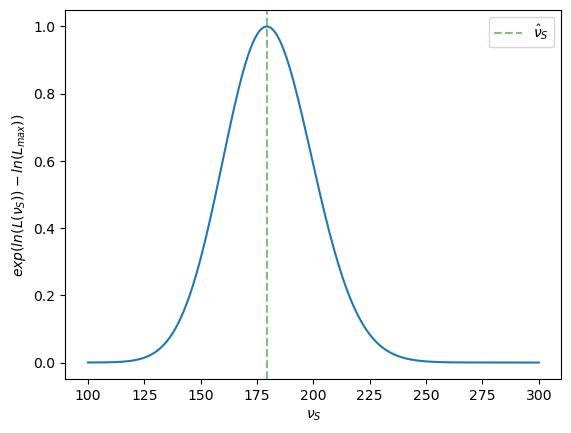

In [8]:
# (d) plot the LLH

nu_sig = np.linspace(100, 300, 201)

llh_sig = np.array([-fitfunc(n,data.x) for n in nu_sig])
yax = np.exp(llh_sig + fitfunc(fit.x[0],data.x))

plt.plot(nu_sig, yax)
plt.axvline(x=fit.x[0], color='green', alpha=0.5, label='$\\hat{\\nu}_{S}$', linestyle='--')
plt.xlabel('$\\nu_{S}$')
plt.ylabel('$exp(ln(L(\\nu_{S})) - ln(L_{max}))$')
plt.legend()

Text(0, 0.5, '$exp(ln(L(\\nu_{S})) - ln(L_{max}))$')

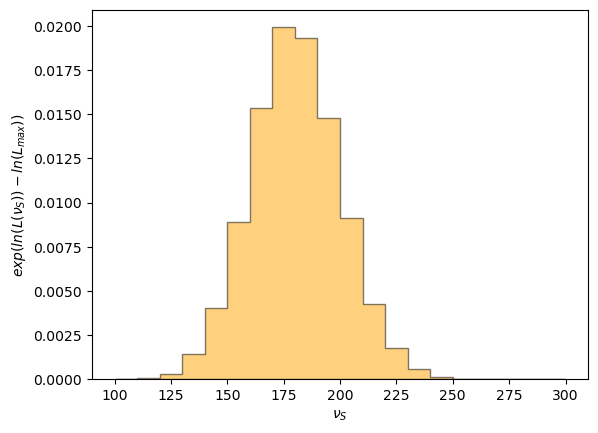

In [9]:
# (e) plot LLH (posterior) assume uniform pdf for nu_S (prior)

r = np.random.uniform(100, 300, 10000)
llh_r = np.array([-fitfunc(n,data.x) for n in r])
w = np.exp(llh_r + fitfunc(fit.x[0],data.x))

plt.hist(r, bins=20, alpha=0.5, histtype='stepfilled', color='orange', edgecolor='black', density=True, weights=w)
plt.xlabel('$\\nu_{S}$')
plt.ylabel('$exp(ln(L(\\nu_{S})) - ln(L_{max}))$')
#plt.legend()

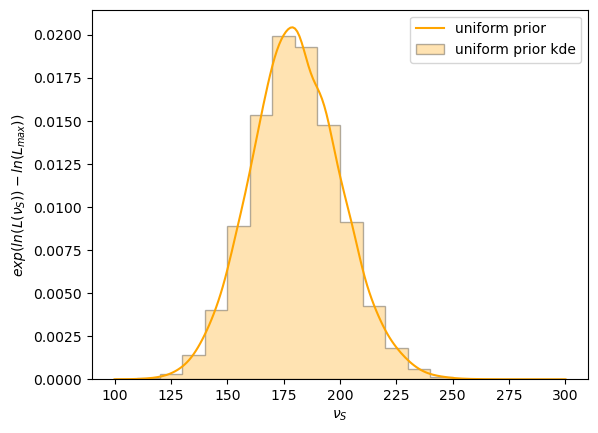

In [10]:
# (f) Gaussian kernel estimator

k = scp.stats.gaussian_kde(r, weights=w)
points = np.linspace(100,300,201)

plt.plot(points, k.pdf(points), color="orange", label="uniform prior")
plt.hist(r, bins=20, alpha=0.3, histtype='stepfilled', color='orange', edgecolor='black', density=True, weights=w, label="uniform prior kde")
plt.xlabel('$\\nu_{S}$')
plt.ylabel('$exp(ln(L(\\nu_{S})) - ln(L_{max}))$')
plt.legend()

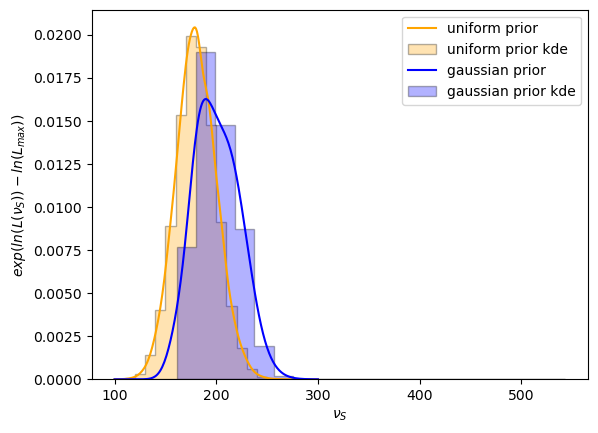

In [11]:
# (g) like (e) and (f) but alternative prior

r2 = np.random.normal(350, 50, 10000)
llh_r2 = np.array([-fitfunc(n,data.x) for n in r2])
w2 = np.exp(llh_r2 + fitfunc(fit.x[0],data.x))

k2 = scp.stats.gaussian_kde(r2, weights=w2)

plt.plot(points, k.pdf(points), color="orange", label="uniform prior")
plt.hist(r, bins=20, alpha=0.3, histtype='stepfilled', color='orange', edgecolor='black', density=True, weights=w, label="uniform prior kde")
plt.plot(points, k2.pdf(points), color="blue", label="gaussian prior")
plt.hist(r2, bins=20, alpha=0.3, histtype='stepfilled', color='blue', edgecolor='black', density=True, weights=w2, label="gaussian prior kde")
plt.xlabel('$\\nu_{S}$')
plt.ylabel('$exp(ln(L(\\nu_{S})) - ln(L_{max}))$')
plt.legend()

In [12]:
# exponential prior

r3 = np.random.exponential(200, 10000)
llh_r3 = np.array([-fitfunc(n,data.x) for n in r3])
w3 = np.exp(llh_r3 + fitfunc(fit.x[0],data.x))

k3 = scp.stats.gaussian_kde(r3, weights=w3)

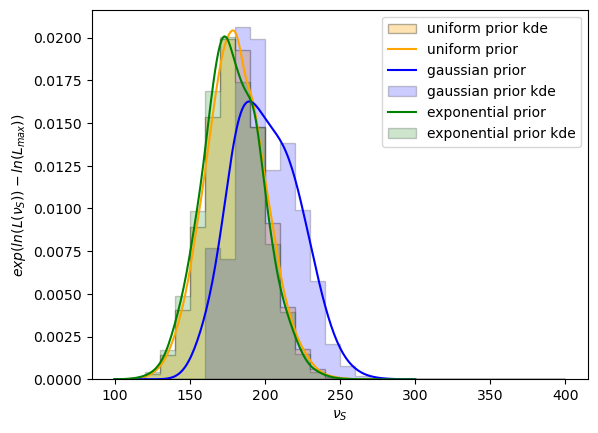

In [13]:
plt.hist(r, bins=30, range=(100,400), alpha=0.3, histtype='stepfilled', color='orange', edgecolor='black', density=True, weights=w, label="uniform prior kde")
plt.plot(points, k.pdf(points), color="orange", label="uniform prior")
plt.plot(points, k2.pdf(points), color="blue", label="gaussian prior")
plt.hist(r2, bins=30, range=(100,400), alpha=0.2, histtype='stepfilled', color='blue', edgecolor='black', density=True, weights=w2, label="gaussian prior kde")
plt.plot(points, k3.pdf(points), color="green", label="exponential prior")
plt.hist(r3, bins=30, range=(100,400), alpha=0.2, histtype='stepfilled', color='green', edgecolor='black', density=True, weights=w3, label="exponential prior kde")
plt.xlabel('$\\nu_{S}$')
plt.ylabel('$exp(ln(L(\\nu_{S})) - ln(L_{max}))$')
plt.legend()

In [14]:
# (h) 2D case: Now both nu_S and nu_B are unknown and have to be estimated. Start with maxLLH using flat prior again:

def fitfunc2D(nu, x):
    nuS = nu[0]
    nuB = nu[1]
    return neg_ext_LLH(nuS, nuB, x)
    
fit2D = scp.optimize.minimize(fitfunc2D, args=data.x, x0=(100.0,100.0), method='Nelder-Mead')
fit2D

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -2874.751023528338
             x: [ 1.754e+02  4.286e+02]
           nit: 56
          nfev: 110
 final_simplex: (array([[ 1.754e+02,  4.286e+02],
                       [ 1.754e+02,  4.286e+02],
                       [ 1.754e+02,  4.286e+02]]), array([-2.875e+03, -2.875e+03, -2.875e+03]))

In [15]:
nu_sig = np.linspace(100, 300, 201)
nu_bkg = np.linspace(300, 500, 201)
S, B = np.meshgrid(nu_sig, nu_bkg)
llhs = np.array([-fitfunc2D((s,b),data.x) for b in nu_bkg for s in nu_sig])
zax = np.exp(llhs + fitfunc2D((fit2D.x[0],fit2D.x[1]),data.x))

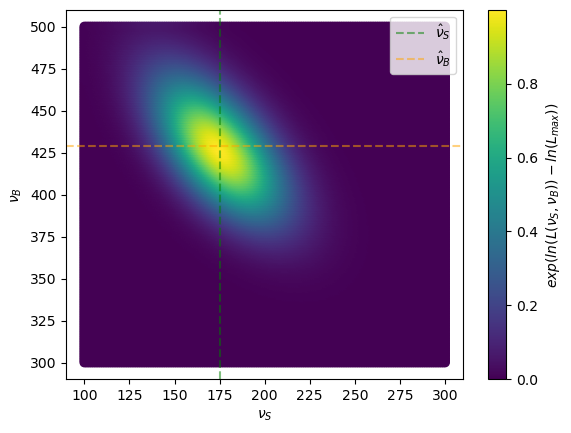

In [16]:
plt.scatter(S,B,c=zax)
plt.axvline(x=fit2D.x[0], color='green', alpha=0.5, label='$\\hat{\\nu}_{S}$', linestyle='--')
plt.axhline(y=fit2D.x[1], color='orange', alpha=0.5, label='$\\hat{\\nu}_{B}$', linestyle='--')
plt.xlabel('$\\nu_{S}$')
plt.ylabel('$\\nu_{B}$')
plt.colorbar(label='$exp(ln(L(\\nu_{S},\\nu_{B})) - ln(L_{max}))$')
plt.legend()

In [17]:
# (i) plot posterior pdf with uniform prior

nus = np.random.uniform(100,300,10000)
nub = np.random.uniform(300,500,10000)

llh = np.array([-fitfunc2D((nus[i],nub[i]),data.x) for i in range(0,nus.size)])

In [18]:
w2D = np.exp(llh + fitfunc2D((fit2D.x[0], fit2D.x[1]),data.x))
w2D.shape

(10000,)

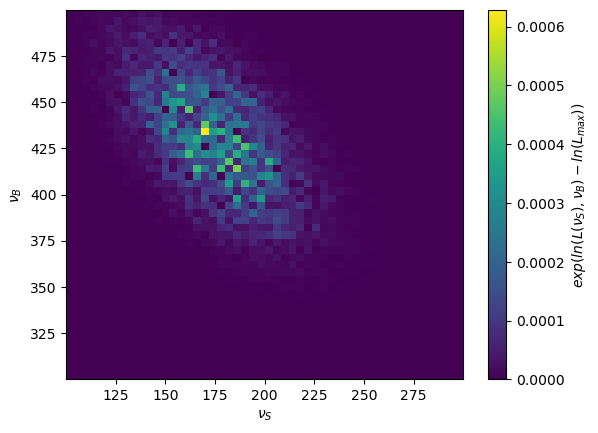

In [19]:
plt.hist2d(nus,nub, bins=50, density=True, weights=w2D)
plt.xlabel('$\\nu_{S}$')
plt.ylabel('$\\nu_{B}$')
cb = plt.colorbar()
cb.set_label('$exp(ln(L(\\nu_{S}),\\nu_{B}) - ln(L_{max}))$')

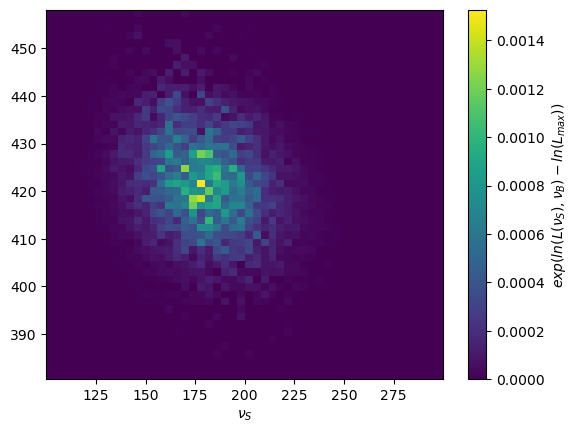

In [97]:
# (j) plot posterior pdf with uniform prior for nu_s and gaussian prior for nu_b

nus = np.random.uniform(100,300,10000)
nub_g = np.random.normal(420.7, 10, 10000)

llh_bg = np.array([-fitfunc2D((nus[i],nub_g[i]),data.x) for i in range(0,nus.size)])
w2D_bg = np.exp(llh_bg + fitfunc2D((fit2D.x[0], fit2D.x[1]),data.x))

plt.hist2d(nus,nub_g, bins=50, density=True, weights=w2D_bg)
plt.xlabel('$\\nu_{S}$')
cb = plt.colorbar()
cb.set_label('$exp(ln(L(\\nu_{S}),\\nu_{B}) - ln(L_{max}))$')